📖 Loaded 31100 verses.
🧠 CALCULATING SENTIMENT (This takes ~15 seconds)...


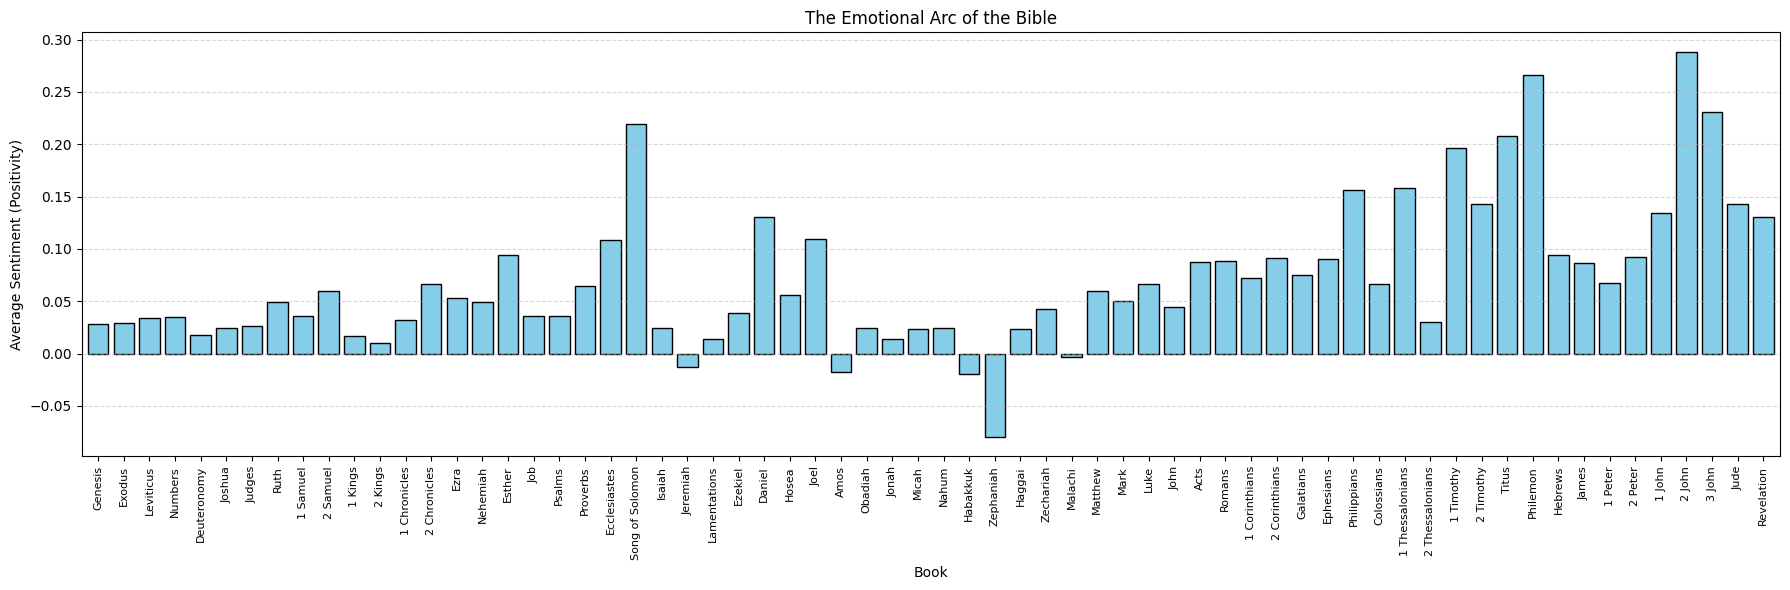

✅ Analysis Complete.


In [4]:
# 02. Sentiment Analysis (Fixed)
# Objective: Analyze the emotional arc of scripture.

import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import os

# 1. Load Data with Safety Check
if not os.path.exists("bible_master.csv"):
    print("❌ ERROR: 'bible_master.csv' not found.")
    print("   Please run notebook 01_ingest.ipynb first to download the data.")
else:
    df = pd.read_csv("bible_master.csv")
    print(f"📖 Loaded {len(df)} verses.")

    # 2. Define Sentiment Function
    def get_sentiment(text):
        # Returns float: -1.0 (Negative) to 1.0 (Positive)
        return TextBlob(str(text)).sentiment.polarity

    print("🧠 CALCULATING SENTIMENT (This takes ~15 seconds)...")
    df['Sentiment'] = df['Text'].apply(get_sentiment)

    # 3. Aggregate by Book
    # We use sort=False to maintain the Biblical order (Genesis -> Revelation)
    book_sentiment = df.groupby('Book_Name', sort=False)['Sentiment'].mean()

    # 4. Visualize
    plt.figure(figsize=(18, 6))
    book_sentiment.plot(kind='bar', color='skyblue', edgecolor='black', width=0.8)
    
    plt.title("The Emotional Arc of the Bible")
    plt.ylabel("Average Sentiment (Positivity)")
    plt.xlabel("Book")
    plt.xticks(rotation=90, fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
    print("✅ Analysis Complete.")